# Project: Will a Customer Show up for a Scheduled Appointment 

The original dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


### Description

+ 'ScheduledDay' tells us on what day the patient set up their appointment.
+	'Neighborhood' indicates the location of the hospital.
+ 'Scholarship' indicates whether or not the patient is enrolled in _Brasilian welfare program Bolsa FamÃlia_.
+	The 'No-show' column: it says 'No' if the patient showed up to their appointment, and 'Yes' if they did not show up.


The purpose of the analysis is to explore the factors that are important for predicting if a patient show up for their scheduled appointment.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

sns.set(style="ticks", color_codes=True)

%matplotlib inline

Importing all the libraries : Pandas, Numpy, Matplotlib, Seaborn, Datetime

In [3]:
appoint = pd.read_csv(r'F:\noshowappointments-kagglev2-may-2016.csv')

Loading the dataset named as 'appoint'.

In [4]:
appoint.shape

(110527, 14)

Shape of the dataset, it has 110527 rows and 12 columns

In [5]:
appoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Getting the details of the dataset columns

In [6]:
appoint.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


displaying 5 rows of the dataset

In [7]:
appoint.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Describing the statistical details of the dataset

In [8]:
appoint.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Checking the missing values. There are no missing values.

In [9]:
appoint.count()


PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

Shows the number of values for a particular column.

In [10]:
appoint.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


Showing the pairwise correlation of all columns.

In [11]:
appoint.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Displaying all the columns in the dataset.

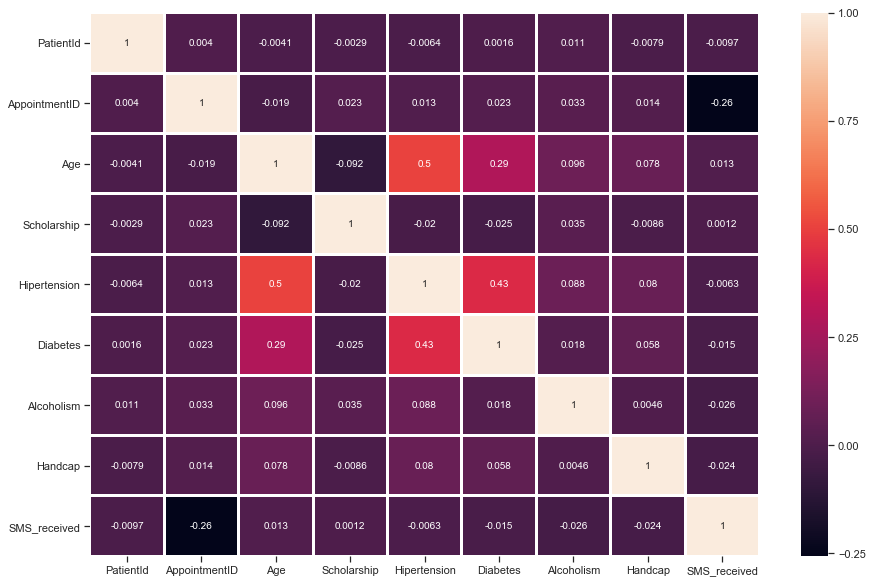

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(appoint.corr(), annot=True, linewidths=2);

Showing the Heatmap on the correlation of the columns.

In [13]:
appoint['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

All the unique values in 'Age' column. Here there is a value '-1' in the column. We have to remove that row.

In [14]:
appoint['Gender'].unique()

array(['F', 'M'], dtype=object)

Unique values of 'Gender' column.

In [15]:
appoint['Scholarship'].unique()

array([0, 1], dtype=int64)

Unique values of 'Scholarship' column.

In [16]:
appoint['SMS_received'].unique()

array([0, 1], dtype=int64)

Unique values of 'SMS_received' column.

In [17]:
appoint.loc[appoint['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Displaying the row which has '-1' value in the 'Age' column.

In [18]:
appoint.drop(99832,axis=0,inplace=True)

dropping the row.

In [19]:
appoint.iloc[99830:99837]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99830,7.216330e+14,5774220,M,2016-06-06T07:59:53Z,2016-06-06T00:00:00Z,1,ROMÃO,0,0,0,0,0,0,No
99831,9.825180e+13,5774337,M,2016-06-06T08:08:00Z,2016-06-06T00:00:00Z,7,CRUZAMENTO,0,0,0,0,0,0,No
99833,2.898270e+13,5774075,M,2016-06-06T07:50:27Z,2016-06-06T00:00:00Z,1,FORTE SÃO JOÃO,0,0,0,0,0,0,No
99834,9.276420e+14,5773979,F,2016-06-06T07:42:52Z,2016-06-06T00:00:00Z,0,ROMÃO,0,0,0,0,0,0,No
99835,3.456370e+14,5773464,F,2016-06-06T07:15:03Z,2016-06-06T00:00:00Z,1,GURIGICA,0,0,0,0,0,0,No
99836,2.664689e+10,5768132,M,2016-06-03T07:21:08Z,2016-06-06T00:00:00Z,3,ROMÃO,0,0,0,0,0,1,No
99837,3.288130e+13,5613881,M,2016-04-25T09:48:57Z,2016-06-06T00:00:00Z,0,ITARARÉ,0,0,0,0,0,1,Yes


Displaying dataset rows between index 99830 and 99837.
We can see that row with index 99832 is dropped.

In [20]:
appoint.shape

(110526, 14)

Displaying the shape of the dataset after dropping.

In [21]:
appoint['ScheduledDay'] = pd.to_datetime(appoint['ScheduledDay'])
appoint['AppointmentDay'] = pd.to_datetime(appoint['AppointmentDay'])

To convert into datetime for the values in the 'ScheduledDay' and 'AppointmentDay'

In [22]:
appoint.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The object is converted into datetime in the particular columns.

In [23]:
appoint['showup'] = pd.get_dummies(appoint['No-show'])['No']

Arranging new column in the dataset with dummy variable 'showup' and converting the categorical values in the 'No-show' into binary values. In show up column, 'No' is equal to 1 and the other('Yes') is equal to '0'.

In [24]:
appoint['female'] = pd.get_dummies(appoint['Gender'])['F']

Arranging new column in the dataset with dummy variable 'female' and converting the categorical values in the 'Gender' into binary values. Where 'F' is equal to 1 and the other('M') is equal to '0'.

This is done to get the statistical data relationship among the dependent and independent variables.

In [25]:
appoint['waiting_time'] = appoint['AppointmentDay'] + datetime.timedelta(hours=24) - appoint['ScheduledDay']

In [26]:
appoint['waiting_days'] = appoint['waiting_time']  / np.timedelta64(1, 'D')

Creating the 'waiting_time' and 'waiting_days' column. These are created by using difference between the Scheduled day and the appointment day

In [27]:
appoint.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,showup,female,waiting_time,waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,1,0 days 05:21:52,0.223519
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,0 days 07:51:33,0.327465
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,1,0 days 07:40:56,0.320093
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,1,0 days 06:30:29,0.271169
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,1,0 days 07:52:37,0.328206
5,9.598510e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1,1,2 days 15:23:09,2.641076
6,7.336880e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,0,1,2 days 08:54:48,2.371389
7,3.449830e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,0,1,2 days 08:20:02,2.347245
8,5.639470e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,1,1,0 days 15:57:44,0.665093
9,7.812460e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1,1,2 days 11:11:35,2.466377


We can see that the waiting time and waiting days are added and the dummy variable columns are added.

In [28]:
appoint['Neighbourhood'].nunique()

81

The no.of unique values in 'Neighbourhood' column is displayed.

In [29]:
df = appoint.drop(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'No-show', 'waiting_time'], axis=1)


In [30]:
df.head()

,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showup,female,waiting_days
0,62,JARDIM DA PENHA,0,1,0,0,0,0,1,1,0.223519
1,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,0.327465
2,62,MATA DA PRAIA,0,0,0,0,0,0,1,1,0.320093
3,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,1,0.271169
4,56,JARDIM DA PENHA,0,1,1,0,0,0,1,1,0.328206


## Data Analysis

Creating new dataset with 'df'. To compute the statistics and create visualizations, we have trimmed and cleaned the data. Now we explore the relationship between variables.

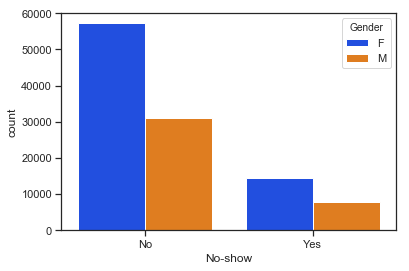

In [31]:
#use count plot to visualize the count by category sns.countplot(x='No-show',data=df,palette='muted');

sns.countplot(x='No-show',hue='Gender',data=appoint,palette='bright');

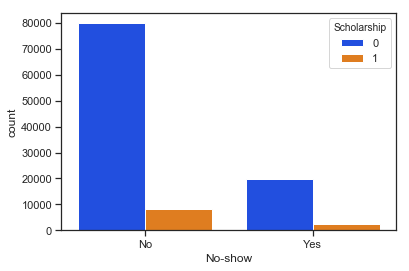

In [32]:
sns.countplot(x='No-show',hue='Scholarship',data=appoint,palette='bright');

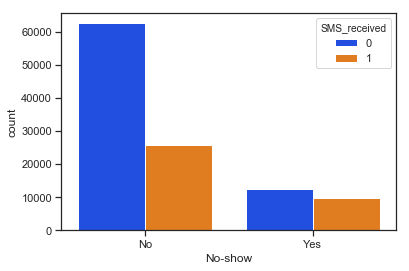

In [33]:
sns.countplot(x='No-show',hue='SMS_received',data=appoint,palette='bright');

#### Gender

Text(0.5, 1.0, 'The relationship between show up rate and gender')

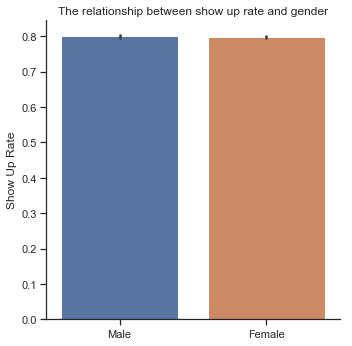

In [34]:
g = sns.catplot(x="female", y="showup", kind="bar", data=df)

(g.set_axis_labels("", "Show Up Rate")
   .set_xticklabels(["Male", "Female"])) 

plt.title('The relationship between show up rate and gender')

In the graph, relation between the show up rate and the gender is shown with no gender differences in it. 

#### Scholarship

Text(0.5, 1.0, 'The relationship between show up rate and Scholarship')

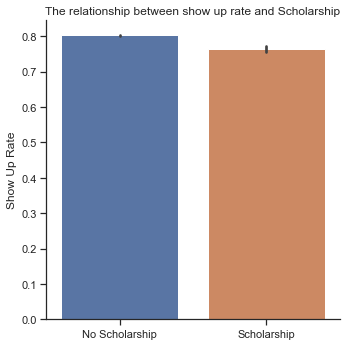

In [35]:
g = sns.catplot(x="Scholarship", y="showup", kind="bar", data=df)

(g.set_axis_labels("", "Show Up Rate")
   .set_xticklabels(["No Scholarship", "Scholarship"])) 

plt.title('The relationship between show up rate and Scholarship')

In the graph, relation between the show up rate and the scholarship is shown. There is a lower show up rate for the people who has enrolled the scholarship.

#### SMS

Text(0.5, 1.0, 'The relationship between show up rate and sms')

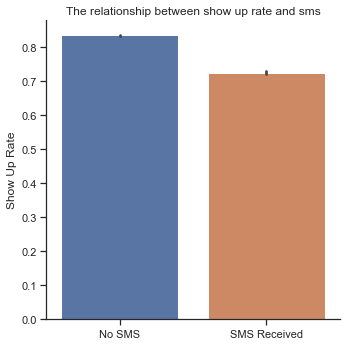

In [36]:
g = sns.catplot(x="SMS_received", y="showup", kind="bar", data=df)

(g.set_axis_labels("", "Show Up Rate")
   .set_xticklabels(["No SMS", "SMS Received"])) 

plt.title('The relationship between show up rate and sms')

In this graph, we see that people who recieved the SMS has the lower showup rate.

#### Scholarship and SMS

Text(0.5, 1.0, 'The relationship between show up rate, scholarship and sms')

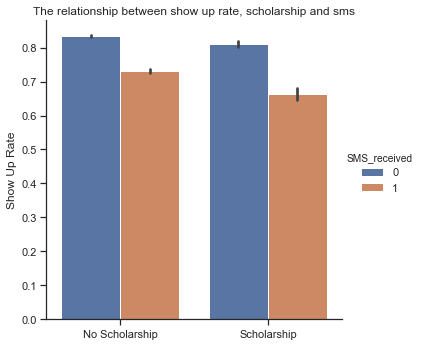

In [37]:
g = sns.catplot(x="Scholarship", y="showup", hue="SMS_received", kind="bar", data=df)

(g.set_axis_labels("", "Show Up Rate")
   .set_xticklabels(["No Scholarship", "Scholarship"])) 

plt.title('The relationship between show up rate, scholarship and sms')

In the graph, the people who received the SMS have lower show up rate if they have enrolled scholarship. And also for the people who did not get the SMS have lower show up rate if they have enrolled scholarship.

#### SMS and Scholarship

Text(0.5, 1.0, 'The relationship between show up rate, scholarship and sms')

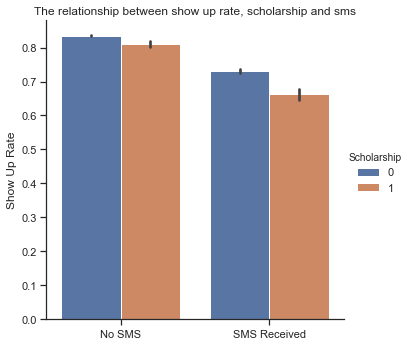

In [38]:
g = sns.catplot(x="SMS_received", y="showup", hue="Scholarship", kind="bar", data=df)

(g.set_axis_labels("", "Show Up Rate")
   .set_xticklabels(["No SMS", "SMS Received"])) 

plt.title('The relationship between show up rate, scholarship and sms')

In the graph, the people who enrolled or not enrolled the Scholarship, both have lower show up rate if they have received SMS.

#### Waiting days

Text(0.5, 1.0, 'The relationship between show up rate and waiting days')

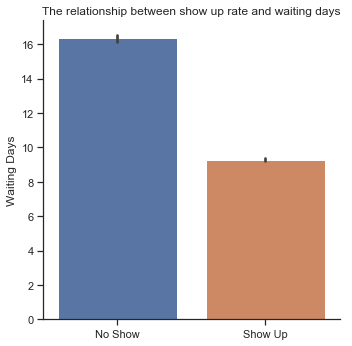

In [39]:
g = sns.catplot(x="showup", y="waiting_days", kind="bar", data=df)

(g.set_axis_labels("", "Waiting Days")
   .set_xticklabels(["No Show", "Show Up"])) 

plt.title('The relationship between show up rate and waiting days')

In this graph, those who show up for the appointment have shorter Waiting time.

#### Waiting days and Scholarship

Text(0.5, 1.0, 'The relationship between show up, waiting days and scholarship')

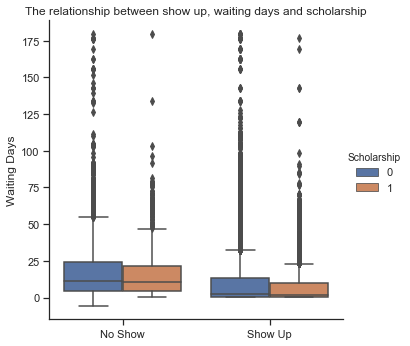

In [40]:
g = sns.catplot(x="showup", y="waiting_days", hue="Scholarship", kind="box", data=df)

(g.set_axis_labels("", "Waiting Days")
   .set_xticklabels(["No Show", "Show Up"])) 

plt.title('The relationship between show up, waiting days and scholarship')

In the graph, the people who enrolled or not enrolled the Scholarship have shorter waiting time if they show up for their appointment.

#### Waiting days and SMS

Text(0.5, 1.0, 'The relationship between show up, waiting days and SMS received')

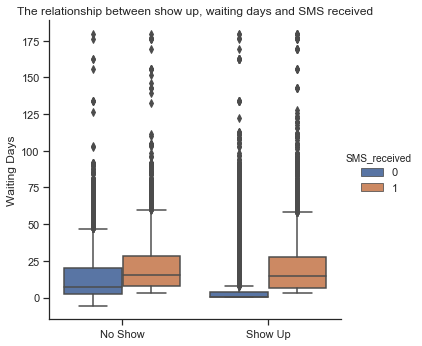

In [41]:
g = sns.catplot(x="showup", y="waiting_days", hue="SMS_received", kind="box", data=df)

(g.set_axis_labels("", "Waiting Days")
   .set_xticklabels(["No Show", "Show Up"])) 

plt.title('The relationship between show up, waiting days and SMS received')

In the graph, the people who received or did not receive the SMS have shorter waiting time if they show up for their appointment.And there is no difference when the SMS is received.

#### Age

Text(0.5, 1.0, 'The relationship between show up rate and age')

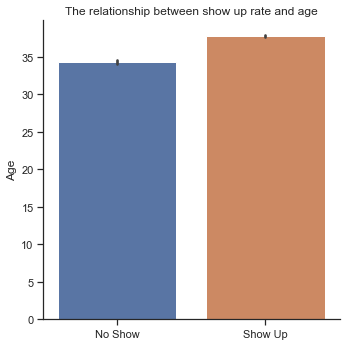

In [42]:
g = sns.catplot(x="showup", y="Age", kind="bar", data=df)

(g.set_axis_labels("", "Age")
   .set_xticklabels(["No Show", "Show Up"])) 

plt.title('The relationship between show up rate and age')

When compared with the age of the patients who did not show up for their appointment, the people who show up have a bit higher age.

#### Age and SMS

Text(0.5, 1.0, 'The relationship between show up rate, age and SMS received')

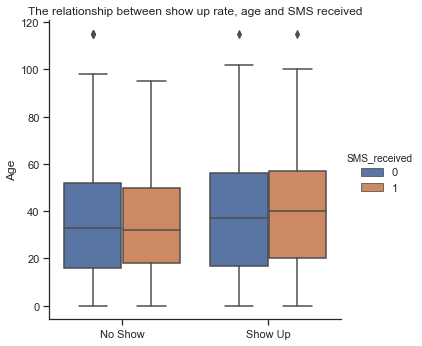

In [43]:
g = sns.catplot(x="showup", y="Age", hue="SMS_received", kind="box", data=df)
(g.set_axis_labels("", "Age")
   .set_xticklabels(["No Show", "Show Up"])) 

plt.title('The relationship between show up rate, age and SMS received')

For people either receivd SMS or not, the average age of those who show up for the appointment is higher.

#### Age and Scholarship

Text(0.5, 1.0, 'The relationship between show up, age and scholarship')

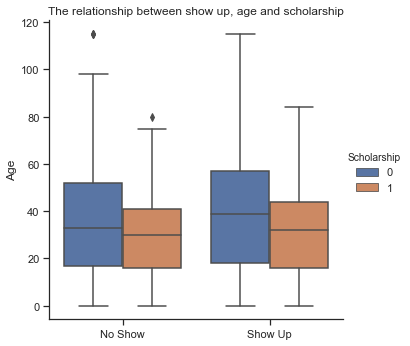

In [44]:
g = sns.catplot(x="showup", y="Age", hue="Scholarship", kind="box", data=df)

(g.set_axis_labels("", "Age")
   .set_xticklabels(["No Show", "Show Up"])) 

plt.title('The relationship between show up, age and scholarship')

If they have enrolled the scholarship or not, the Average age show up people is a is a bit higher than no show people.

### Problem Statement

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [45]:
df['intercept'] = 1

In [46]:
lm = sm.Logit(df['showup'], df[['intercept', 'female', 'Age', 'Scholarship', 'SMS_received', 'waiting_days']])
results = lm.fit()
results.summary()

C:\anaco\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 6


C:\anaco\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\anaco\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 showup   No. Observations:               110526
Model:                          Logit   Df Residuals:                   110520
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:                     inf
Time:                        21:59:36   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.5428      0.018     85.043      0.000       1.507       1.578
female          -0.0051      0.016     -0.311      0.756      -0.037       0.027
Age              0.0075      0.000     21.903      0.000       0.007       0.008
Scholarship     -0.2340      0.025     -9.481      0.000      -0.282      -0.186
SMS_received    -0.3524      0.017    -20.913      0.000      -0.385      -0.319
waiting_days    -0.0228      0.000    -47.011      0.000      -0.024      -0.022
================================================================================
"""

 .fit() it used to fitting the model to the training data.
 .summary() describes the statistical information 

In [47]:
np.exp(results.params)

intercept       4.677465
female          0.994927
Age             1.007503
Scholarship     0.791353
SMS_received    0.703000
waiting_days    0.977453
dtype: float64

.exp() is a mathematical function which calculates the exponential of all the elements in the input array.
.params is an attribute have features such as type and range checking, dynamically generated values,etc. 

Exponential of each of the coefficients generates the odds ratios. This tells us how a 1 unit increae or decrease in a variable effects the odds of being showed up.

In [48]:
1 / _

intercept       0.213791
female          1.005099
Age             0.992553
Scholarship     1.263659
SMS_received    1.422475
waiting_days    1.023067
dtype: float64

we have predicted the probability using logit function.

#### Result Analysis

+ Gender does not have a significant effect on the show up rate (P = 0.757 > 0.05)

+ For every 1 year increase in age, the show up rate is 1.01 times as likely holding all else constant (P = 0.00 < 0.05).

+ For every 1 day decrease in waiting time, the show up rate is 1.02 times as likely holding all else constant (P = 0.00 < 0.05).

+ If patients did not receive SMS, the show up rate is 1.42 times than receving SMS, holding all else constant (P = 0.00 < 0.05).

+ The show up rate of patients who were not enrolled in Brasilian welfare program Bolsa Família is 1.26 times more than those enrolled, holding all else constant (P = 0.00 < 0.05).

### Confusion Matrix

Confusion Matrix is used for evaluating the performance of a classification model.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

import libraries

In [50]:
y = df['showup']
x = appoint[['Scholarship', 'SMS_received']]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state=42)

In [52]:
log_mod = LogisticRegression()

In [53]:
log_mod.fit(x_train, y_train)

C:\anaco\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
from sklearn.linear_model import LogisticRegression

log_mod = LogisticRegression()
log_mod.fit(x_train,y_train)

# generate predictions
predicts_train = log_mod.predict(x_train)
predicts_test = log_mod.predict(x_test)

C:\anaco\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import roc_curve,auc,confusion_matrix, \
classification_report,accuracy_score

print(classification_report(y_train,predicts_train))
print("Accuracy:",accuracy_score(y_train, predicts_train))

print(classification_report(y_test,predicts_test))
print("Accuracy:",accuracy_score(y_test, predicts_test))

C:\anaco\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anaco\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anaco\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anaco\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anaco\lib\site-packages\sklearn\metrics\classification.py:114

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     20073
           1       0.80      1.00      0.89     79400

   micro avg       0.80      0.80      0.80     99473
   macro avg       0.40      0.50      0.44     99473
weighted avg       0.64      0.80      0.71     99473

Accuracy: 0.7982065485106511
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2246
           1       0.80      1.00      0.89      8807

   micro avg       0.80      0.80      0.80     11053
   macro avg       0.40      0.50      0.44     11053
weighted avg       0.63      0.80      0.71     11053

Accuracy: 0.796797249615489


The classification_report () function displays the precision, recall, f1 score and support
for each class

This is a weighted average of the true positive rate (recall) and precision, where an F1
score reaches its best value at 1 and worst at 0.

In [56]:
y_predicts = log_mod.predict(x_test)

In [57]:
precision_score(y_test, y_predicts)

0.796797249615489

Precision tells us how many of the correctly predicted cases actually turned out to be positive.

In [58]:
recall_score(y_test, y_predicts)

1.0

Recall tells us how many of the actual positive cases we were able to predict correctly with our model.

In [59]:
accuracy_score(y_test, y_predicts)

0.796797249615489

In [60]:
confusion_matrix(y_test, y_predicts)

array([[   0, 2246],
       [   0, 8807]], dtype=int64)

In [61]:
precision_score(y_test, y_predicts)

0.796797249615489

n=110053| Actual No | Actual Yes
---------| -------------| -------------
Predicted No | 0| 2225
Predicted Yes | 0| 8828

We could use welfare enrolled and SMS received to predict whether a patient will show up for an appointment:
+ accuracy: 0.80,
+ sensitivity: 1.0,
+ precision: 0.80.

### Conclusion:

Age, waiting time, SMS received and welfare enrolled have a significant impact on predicting whether a patient will show up for the scheduled appointment, whereas gender does not (P = 0.757 > 0.05).

Receiving SMS or Scholarship could be more important for predicting if a patient will show up for their scheduled appointment.

When we use Scholarship and SMS received to predict whether a patient will show up for an appointment, the accuracy could reach 0.80, with the sensitivity of 1.0 and precision of 0.80.